# Python Machine Learning Case Studies
## Chapter 1
### Exploratory Data Analysis - Cycle Sharing Scheme

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('trip.csv')

#### Get some basic details

In [3]:
print(len(data))
data.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


#### Get the time range

In [15]:
data_startorder = data.sort_values(by='starttime')
data_startorder.reset_index()

data_stoporder = data.sort_values(by='stoptime')
data_stoporder.reset_index()

print('Date range of dataset: {} - {}'.format(
    data_startorder['starttime'][1],
    data_stoporder['stoptime'][len(data)-1])
)

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


#### User types

<Axes: title={'center': 'Disribution of user types'}, xlabel='usertype'>

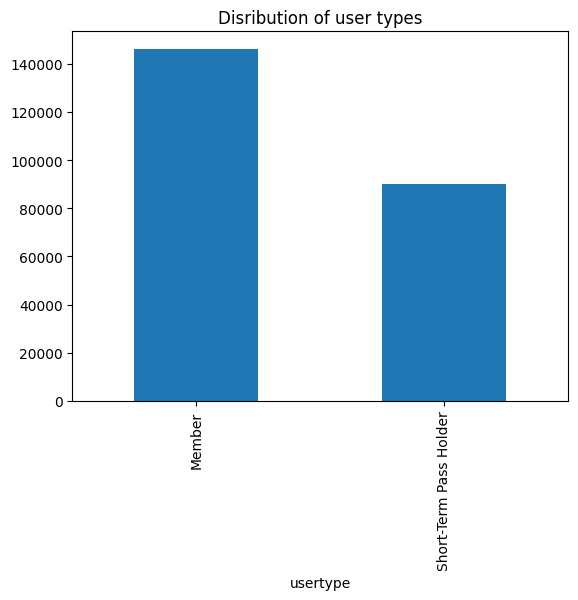

In [16]:
groupby_usertype = data.groupby('usertype').size()
groupby_usertype.plot.bar(title='Disribution of user types')

#### Gender distribution

<Axes: title={'center': 'Disribution by gender'}, xlabel='gender'>

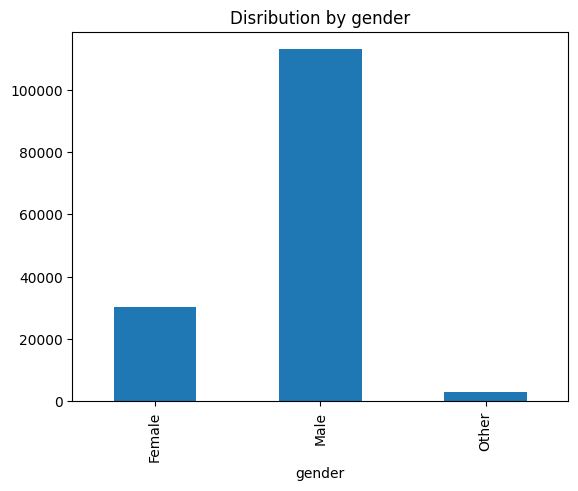

In [17]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Disribution by gender')

#### Distribution of birth years

<Axes: title={'center': 'Distribution of birth years'}, xlabel='birthyear'>

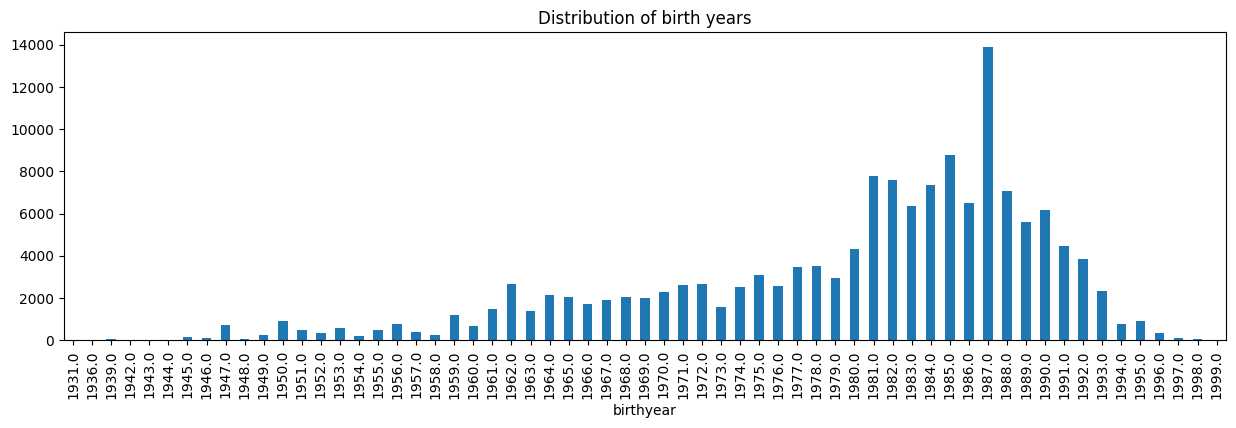

In [18]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years',
                           figsize=(15,4))

#### Frequency of member types for millenials

<Axes: title={'center': 'Distribution by user types - Millenials'}, xlabel='usertype'>

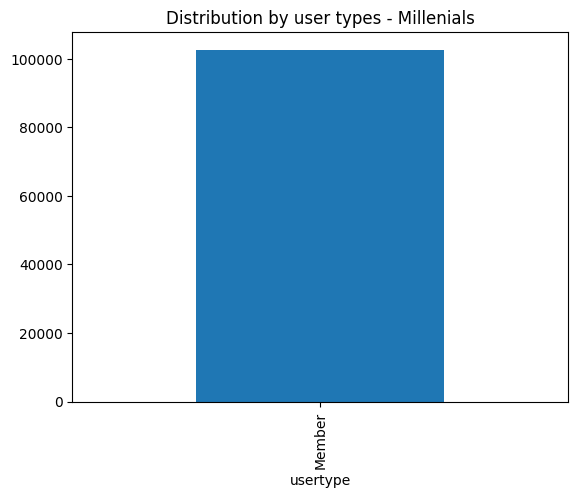

In [19]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <= 1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution by user types - Millenials')

### Multivariate Analysis
#### Distribution of birth year by gender

<Axes: title={'center': 'Distribution of birth years by gender'}, xlabel='birthyear'>

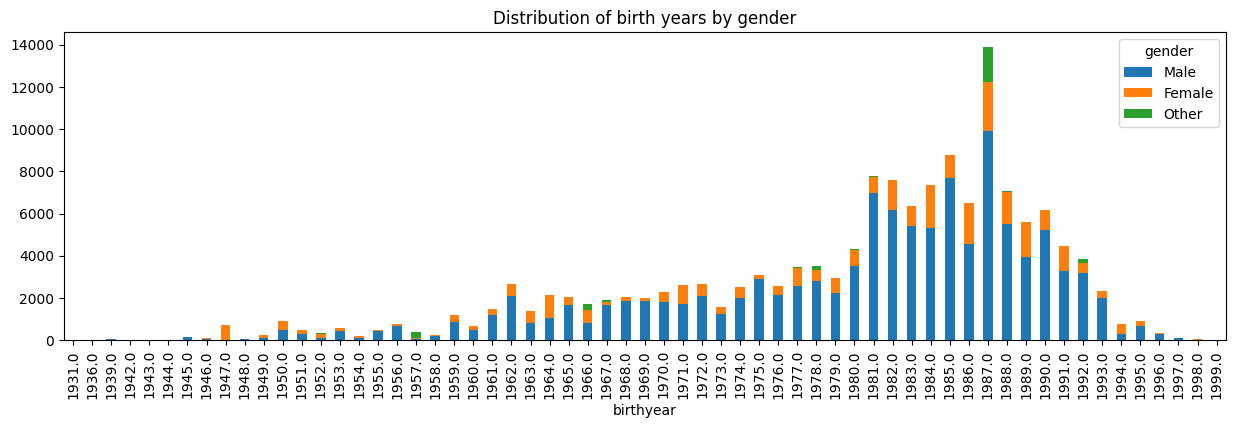

In [21]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male', 'Female', 'Other']].plot.bar(title='Distribution of birth years by gender', stacked=True, figsize=(15,4))